In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from d2l import torch as d2l
#Softmax regression was super cool. but limited.  
#Can only solve for linear models.  Ie a certain pixel intensity being brighter always means shoes over hats etc
#We can make things much more general by adding a hidden layer.
#A two layer MLP has one hidden layer and one output layer
#H=X*W1+B1
#O=H*W2+B2
#This is useless at first because a linear sum is still linear
#Lets add an activation function.  A nonlinear function that acts on node outputs
#H=A(X*W1+B1)
#O=H*W2+B2
#Now it is not linear
#activations essentially determine if a neuron fired or not



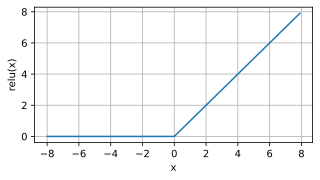

In [2]:
#We know relu

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))


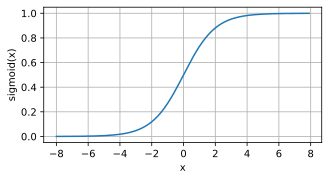

In [3]:
#sigmoid = 1/(1+exp(-x))
#squashes into 0.0,1.0.  Originally, people used binary neurons, but when we need to take derivative, smoothness is nice
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

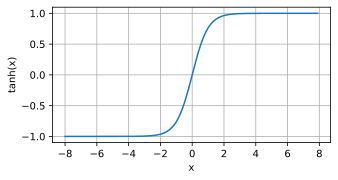

In [4]:
#tanh is pretty much identical to sigmoid -- meain thing is that it is symmetric
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

In [5]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [6]:
#using the fashion set, 28x28=784 pixels and 10 classes
num_inputs, num_outputs, num_hiddens = 784, 10, 256

#Initialize weights and biases
#inputs->N1->Outputs
#H=inputsxW1+b1
#O=HxW2+b1
#inputs are 1x784 and 256 neurons then 1x784 * 784x256 I think
W1 = nn.Parameter(
    torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(
    torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [7]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [8]:
#So now our model.  inputs are the 784 X's
#first layer you take the matmul of X and W1 + b1
#then do relu (call H)
#then the second layer takes relu output and does HxW2+b2
def net(X):
    X1 = X.reshape((-1, num_inputs))
    H = relu(X1 @ W1 + b1)  # Here '@' stands for matrix multiplication
    return ((H @ W2 + b2))
loss = nn.CrossEntropyLoss()

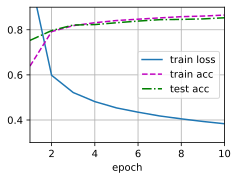

In [9]:

num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)